<a href="https://colab.research.google.com/github/DangTrungNhut/Final_Report_AI/blob/main/DetectFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XÂY DỰNG MÔ HÌNH NHẬN DIỆN KHUÔN MẶT SỬ DỤNG CNN

Dang Trung Nhut  - 20146386

In [ ]:
# Kết nối google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from keras.models import load_model
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Giải nén tập dữ liệu rar

!apt-get install -y unrar
rar_file_path = "/content/drive/MyDrive/AI/ProjectFace/FaceDetect.rar" 
extract_file_path = "/content/drive/MyDrive/AI/ProjectFace/DataGianNen" 
!unrar x '{rar_file_path}' '{extract_file_path}'

In [ ]:
# Tạo biến train với các thông số cần thiết cho việc tạo dữ liệu huấn luyện
Datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                           zoom_range = 0.2, horizontal_flip = True)

# Đường dẫn đến tập dữ liệu huấn luyện - giải nén trước đó
train_data = '/content/drive/MyDrive/AI/ProjectFace_OK/DataGiaiNen/FaceDetect/Train'

In [ ]:
# Data huấn luyện
# class_mode>> nhãn được mã hóa dưới dạng one-hot encoding (nhị phân)
train_dataset = Datagen.flow_from_directory(train_data,target_size = (150,150),
                                            batch_size = 128, class_mode = 'categorical')

Found 2060 images belonging to 13 classes.


In [ ]:
train_dataset.class_indices

{'AnTan': 0,
 'AnhTan': 1,
 'ChiCuong': 2,
 'HoangPhuc': 3,
 'JosVan': 4,
 'MinhTan': 5,
 'MinhThanh': 6,
 'Nhut': 7,
 'Quan': 8,
 'TanPhat': 9,
 'TanThanh': 10,
 'ThanhNha': 11,
 'TienDat': 12}

In [ ]:
# Xây dựng mô hình

model = Sequential() # Khởi tạo mô hình

#Hàm kích hoạt phi tuyến ReLU(x) = max(0, x)
model.add(Conv2D(16,(3,3),activation = 'relu',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(16,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5)) # Hạn chế overfitting

model.add(Flatten())   # Chuyển đầu ra của lớp trước thành 1D
model.add(Dense(256,activation='relu',))
model.add(Dropout(0.5))
model.add(Dense(13,activation='softmax')) # Chuyển thành sác xuất

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,batch_size=32,epochs=40,verbose=1)

Epoch 1/40
17/17 [==============================] - 540s 31s/step - loss: 2.7384 - accuracy: 0.2553
Epoch 2/40
17/17 [==============================] - 190s 11s/step - loss: 0.6774 - accuracy: 0.7942
Epoch 3/40
17/17 [==============================] - 186s 11s/step - loss: 0.2469 - accuracy: 0.9209
Epoch 4/40
17/17 [==============================] - 187s 11s/step - loss: 0.0678 - accuracy: 0.9811
Epoch 5/40
17/17 [==============================] - 192s 11s/step - loss: 0.0398 - accuracy: 0.9883
Epoch 6/40
17/17 [==============================] - 185s 11s/step - loss: 0.0231 - accuracy: 0.9937
Epoch 7/40
17/17 [==============================] - 185s 11s/step - loss: 0.0158 - accuracy: 0.9947
Epoch 8/40
17/17 [==============================] - 187s 11s/step - loss: 0.0195 - accuracy: 0.9966
Epoch 9/40
17/17 [==============================] - 187s 11s/step - loss: 0.0125 - accuracy: 0.9956
Epoch 10/40
17/17 [==============================] - 187s 11s/step - loss: 0.0224 - accuracy: 0.9937

In [ ]:
# Save mô hình file.h5
model.save('/content/drive/MyDrive/AI/ProjectFace/DetectFace5.h5')

In [ ]:
# Load mô hình và sử dụng
model_Face = load_model('/content/drive/MyDrive/AI/ProjectFace/DetectFace.h5')

In [ ]:
# Danh sánh nhãn tương ứng
labels = ['AnTan','AnhTan','ChiCuong','HoangPhuc','JosVan' ,
          'MinhTan','MinhThanh', 'Nhut','Quan','TanPhat','TanThanh','ThanhNha','TienDat']

1/1 [==============================] - 0s 32ms/step
Đây là:  Nhut


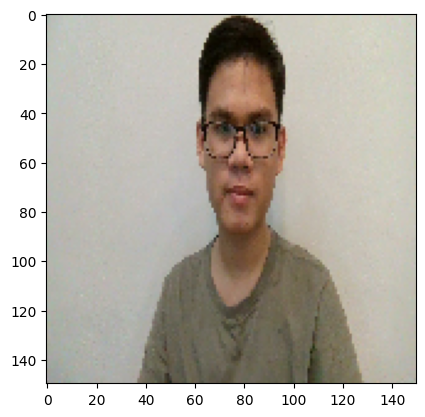

In [ ]:
# Test mô hình bằng ảnh Test + ảnh ngoài
# (Vì tự xây dựng dữ liệu, dữ liệu không đc phong phú, nên không chia thành file đánh giá)
img = load_img('/content/WIN_20230517_16_23_52_Pro.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
print('Đây là: ',labels[int(np.argmax(model_Face.predict(img),axis=-1))])

1/1 [==============================] - 0s 74ms/step
Đây là:  TanThanh


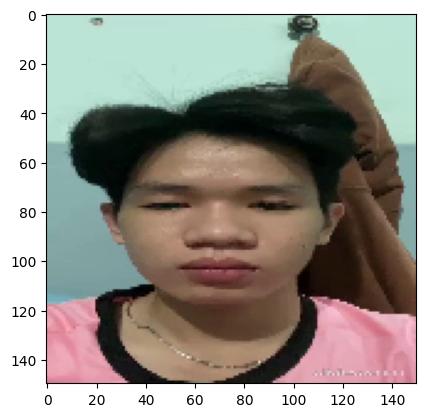

In [ ]:
img = load_img('/content/drive/MyDrive/AI/ProjectFace/DataGiaiNen/FaceDetect/Test/6225.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
print('Đây là: ',labels[int(np.argmax(model_Face.predict(img),axis=-1))])